In [1]:
import geopandas as gpd

file = gpd.read_file('h3.geojson')
file

,index,hex_id,isdep,latitude,longitude,altitude,elevation,population,NDVI,NDMI,NDSI,NDWI,osmnx,cluster,geometry
0,871f903b2ffffff,871f903b2ffffff,True,45.723691,4.413664,0,358.636353,41.230039,0.775256,0.459262,-0.459262,-0.295604,0.360086,0,"POLYGON ((4.39744 45.72759, 4.39957 45.71549, ..."
1,871f90333ffffff,871f90333ffffff,True,45.870032,4.528088,0,394.918030,90.479839,0.807938,0.331552,-0.331552,-0.496880,0.332409,1,"POLYGON ((4.51183 45.87393, 4.51394 45.86184, ..."
2,871f90b5bffffff,871f90b5bffffff,True,46.205710,4.672669,0,314.385254,19.414036,0.539256,0.036094,-0.036094,-0.571138,0.630759,2,"POLYGON ((4.65633 46.20960, 4.65843 46.19755, ..."
3,871f90210ffffff,871f90210ffffff,True,45.721521,4.662772,0,335.368866,168.192235,0.716485,0.333971,-0.333971,-0.358648,0.372371,3,"POLYGON ((4.64654 45.72546, 4.64862 45.71334, ..."
4,871f9031effffff,871f9031effffff,True,45.822009,4.583158,0,374.008270,199.243543,0.595278,0.196806,-0.196806,-0.397293,0.217765,4,"POLYGON ((4.56691 45.82593, 4.56901 45.81383, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,871f9031affffff,871f9031affffff,True,45.805987,4.601505,0,347.231415,332.012686,0.650319,0.213773,-0.213773,-0.436509,0.445657,564,"POLYGON ((4.58526 45.80991, 4.58735 45.79780, ..."
565,871f90058ffffff,871f90058ffffff,True,45.796282,4.400933,0,318.925629,36.785162,0.723864,0.423227,-0.423227,-0.259917,0.303766,565,"POLYGON ((4.38470 45.80017, 4.38683 45.78808, ..."
566,871f90233ffffff,871f90233ffffff,True,45.757872,4.656514,0,370.661163,179.168792,0.680239,0.244367,-0.244367,-0.434278,0.306109,566,"POLYGON ((4.64027 45.76181, 4.64236 45.74969, ..."
567,871f90393ffffff,871f90393ffffff,True,45.675643,4.468654,0,304.256195,54.102817,0.563479,0.298499,-0.298499,-0.217675,0.653257,567,"POLYGON ((4.45244 45.67956, 4.45455 45.66744, ..."


In [1]:
'ABC'.lower()

'abc'

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

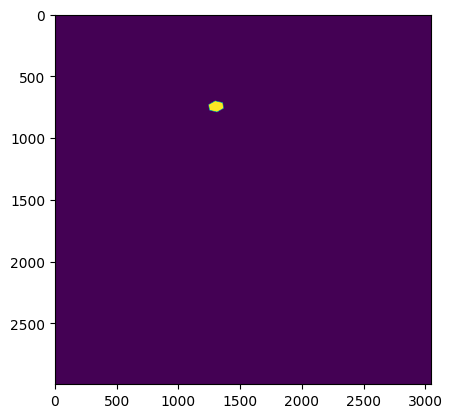

In [18]:
import geopandas as gpd
import rasterio
import rasterio.features
import rasterio.warp
import numpy as np
import matplotlib.pyplot as plt

def read_tif(name):
    """
    Open a satellite images and return bands, latitude and longitude of each pixel.
    """
    with rasterio.open(name) as src:
        dt = src.read()
        height = dt.shape[1]
        width = dt.shape[2]
        cols, rows = np.meshgrid(np.arange(width), np.arange(height))
        xs, ys = rasterio.transform.xy(src.transform, rows, cols)
        lons = np.array(xs)
        lats = np.array(ys)
        src.close()
    return dt, lons, lats

image, _, _ = read_tif('high.tif')
print(np.unique(image))
m1 = np.unique(image)
image = image[0]
plt.imshow(image == 11)

[  0.   1.   2.   3.   4.   5.   7.  10.  11.  12.  13.  14.  15.  16.
  18.  19.  20.  21.  22.  23.  24.  25.  27.  28.  29.  30.  31.  32.
  33.  34.  35.  36.  38.  39.  41.  42.  44.  45.  46.  48.  50.  51.
  52.  53.  54.  55.  56.  57.  59.  60.  61.  62.  63.  64.  65.  66.
  67.  68.  69.  70.  72.  73.  74.  75.  77.  78.  79.  80.  81.  82.
  83.  84.  85.  87.  88.  89.  90.  91.  92.  93.  94.  95.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 120. 121. 122. 123. 124. 125. 126. 127.
 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140. 141.
 142. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154. 155. 157.
 158. 159. 161. 162. 163. 164. 165. 166. 167. 168. 169. 170. 171. 172.
 173. 174. 175. 176. 177. 178. 179. 180. 181. 182. 183. 185. 187. 188.
 189. 190. 192. 193. 194. 195. 196. 197. 198. 199. 200. 201. 202. 203.
 204. 205. 206. 207. 208. 209. 210. 211. 212. 213. 214. 215. 216. 217.
 218. 

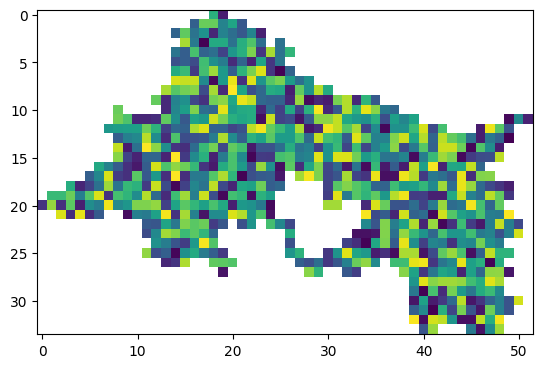

In [15]:
import geopandas as gpd
import rasterio
import rasterio.features
import rasterio.warp
import numpy as np
import matplotlib.pyplot as plt

def read_tif(name):
    """
    Open a satellite images and return bands, latitude and longitude of each pixel.
    """
    with rasterio.open(name) as src:
        dt = src.read()
        height = dt.shape[1]
        width = dt.shape[2]
        cols, rows = np.meshgrid(np.arange(width), np.arange(height))
        xs, ys = rasterio.transform.xy(src.transform, rows, cols)
        lons = np.array(xs)
        lats = np.array(ys)
        src.close()
    return dt, lons, lats

image, _, _ = read_tif('departement-13-bouches-du-rhone_low.tif')
print(np.unique(image))
m2 = np.unique(image)
image = image[0]
plt.imshow(image)

In [21]:
print(m2[~np.isin(m2, m1)])
print(m1[~np.isin(m1, m2)])

[nan]
[  8.   9.  10.  20.  28.  31.  34.  43.  45.  55.  63.  72.  73.  78.
  89.  98. 110. 134. 149. 152. 161. 176. 179. 194. 196. 201. 208. 214.
 216. 231. 250. 255. 259. 265. 280. 285. 286. 298. 307. 324. 325. 346.
 362. 367. 390. 409. 412. 430. 432. 442. 447. 448. 452. 474. 486. 494.
 498. 500. 502. 528. 530. 541. 549. 551. 557. 558.  nan]


In [5]:
np.unique(image).shape

(1150,)